<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/UCSanDiegoX---Machine-Learning-Fundamentals-03-Jan-2019-audit/blob/master/Week%2002%20Generative%20Modeling%20I/bivariate-gaussian/Bivariate_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments with the bivariate Gaussian

# Clone remote

In [1]:
import os

URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/UCSanDiegoX---Machine-Learning-Fundamentals-03-Jan-2019-audit"
NBDIR = "Week 02 Generative Modeling I/bivariate-gaussian"

def clone(url, dpath=".", branch="master"):
  """
  Clone remote branch from url into dpath
  branch not provided: clone all branches
  """

  url = url.strip("/")
  rname = os.path.basename(url)
  rpath = os.path.join(dpath, rname)

  # Raise error if dpath inside existing repository
  is_out = !git -C "$dpath" rev-parse
  if not is_out: # inside repository
    raise ValueError("Can't clone into existing repository")
  
  # Clone specific branch
  if branch:
    !git clone --single-branch --branch "$branch" "$url" "$rpath"
  # Clone all branches
  else:
    !git clone "$url" "$rpath"
  os.chdir(rpath)
  
  bname = !git rev-parse --abbrev-ref HEAD
  print("Current")
  print("{branch}\t{directory}".format(branch=bname, directory=os.getcwd()))
  
clone(URL)
%run .Importable.ipynb
%cd "$NBDIR"

Cloning into './UCSanDiegoX---Machine-Learning-Fundamentals-03-Jan-2019-audit'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 285 (delta 16), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (285/285), 2.60 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Current
['master']	/content/UCSanDiegoX---Machine-Learning-Fundamentals-03-Jan-2019-audit


/content/UCSanDiegoX---Machine-Learning-Fundamentals-03-Jan-2019-audit/Week 02 Generative Modeling I/bivariate-gaussian


In this notebook, we'll get a feel for the two-dimensional Gaussian by varying the covariance matrix, drawing random samples from the resulting distribution, and plotting contour lines of the density.

We begin, as always, by loading in standard packages.

In [0]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

The function **bivariate_plot** takes as input three parameters that uniquely specify a 2x2 covariance matrix:
* `var1`, the variance of the first feature, `x1`
* `var2`, the variance of the second feature, `x2`
* `corr`, the correlation between `x1` and `x2`

It then depicts a 2-d Gaussian whose mean is the origin and whose covariance matrix is given by these parameters. The display consists of 100 points randomly sampled from the Gaussian, as well as three representative contour lines of the density.

The first line below, **interact_manual**, sets up an interactive widget that allows you to specify the parameters to **bivariate_plot** using sliders, and provides a button to execute the function.

interactive(children=(IntSlider(value=5, description='var1', max=9, min=1), IntSlider(value=5, description='va…

Covariance matrix:
[[ 1.   -0.71]
 [-0.71  2.  ]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


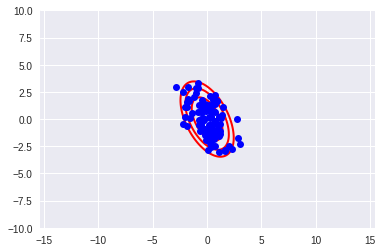

Covariance matrix:
[[1. 0.]
 [0. 2.]]


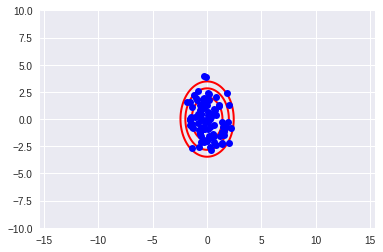

Covariance matrix:
[[1.   0.71]
 [0.71 2.  ]]


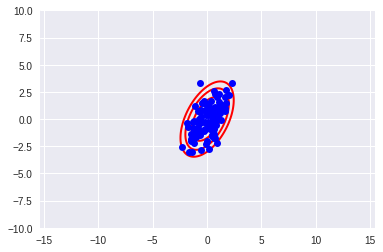

In [6]:
@interact_manual(var1 = (1,9), var2 = (1,9), corr=(-0.95,0.95,0.05))
def bivariate_plot(var1, var2, corr):
    #
    # Set parameters of Gaussian
    mu = [0,0]
    covariance = corr * np.sqrt(var1) * np.sqrt(var2)
    sigma = [[var1,covariance], [covariance,var2]]
    np.set_printoptions(precision=2)
    print("Covariance matrix:")
    print(np.around(sigma, decimals=2))
    #
    # Draw samples from the distribution
    n = 100
    x = np.random.multivariate_normal(mu,sigma,size=n)
    #
    # Set up a plot for the samples and the density contours
    lim = 10.0
    plt.xlim(-lim, lim) # limit along x1-axis
    plt.ylim(-lim, lim) # limit along x2-axis    
    plt.axes().set_aspect('equal', 'datalim')
    #
    # Plot the sampled points as blue dots
    plt.plot(x[:,0], x[:,1], 'bo')
    #
    # To display contour lines, first define a fine grid
    res = 200
    xg = np.linspace(-lim, lim, res)
    yg = np.linspace(-lim, lim, res)
    z = np.zeros((res,res))
    # Compute the density at each grid point
    rv = multivariate_normal(mean=mu, cov=sigma)
    for i in range(0,res):
        for j in range(0,res):
            z[j,i] = rv.logpdf([xg[i], yg[j]]) 
    sign, logdet = np.linalg.slogdet(sigma)
    normalizer = -0.5 * (2 * np.log(6.28) + sign * logdet)
    # Now plot a few contour lines of the density
    for offset in range(1,4):
        plt.contour(xg,yg,z, levels=[normalizer - offset], colors='r', linewidths=2.0, linestyles='solid')

    # Finally, display
    plt.show()

for var1, var2, corr in [(1, 2, -0.5), (1, 2, 0), (1, 2, 0.5)]:
  bivariate_plot(var1, var2, corr)

## <font color="magenta">Quick exercise:</font>
Experiment with the widget above to get a sense for how the different parameters influence the shape of the Gaussian. In particular, figure out the answers to the following questions.
* Under what conditions does the Gaussian have contour lines that are perfect circles?
* Under what conditions is the Gaussian tilted upwards?
* Under what conditions is the Gaussian titled downwards?
* Suppose the Gaussian has no tilt, and the contour lines are stretched vertically, so that the vertical stretch is twice the horizontal stretch. What can we conclude about the covariance matrix?

*Note down the answers to these questions: you will enter them later, as part of this week's assignment.*

In [0]:
random.seed(0)

Covariance matrix:
[[7.06 0.  ]
 [0.   7.06]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


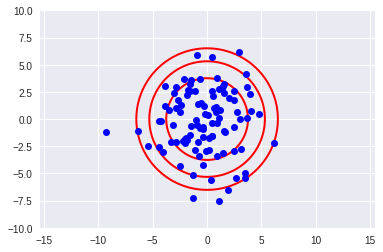

In [13]:
# Contour lines perfectly circular
var1 = var2 = random.uniform(1, 9)
corr = 0
bivariate_plot(var1, var2, corr)

Covariance matrix:
[[4.36 1.87]
 [1.87 3.07]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


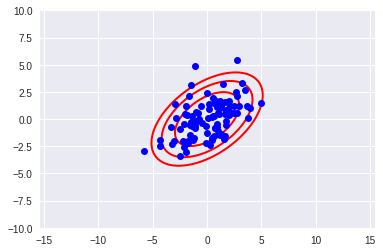

In [14]:
# Contour lines tilted upwards
var1, var2 = random.uniform(1, 9), random.uniform(1, 9)
corr = random.uniform(0, 1)
bivariate_plot(var1, var2, corr)

Covariance matrix:
[[ 4.24 -3.87]
 [-3.87  7.27]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


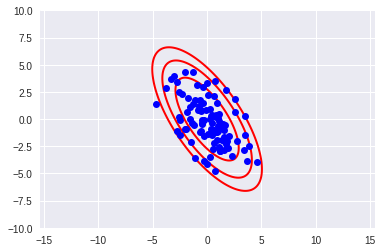

In [15]:
# Contour lines tilted downwards
var1, var2 = random.uniform(1, 9), random.uniform(1, 9)
corr = random.uniform(-1, 0)
bivariate_plot(var1, var2, corr)

Covariance matrix:
[[ 5.67  0.  ]
 [ 0.   22.67]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


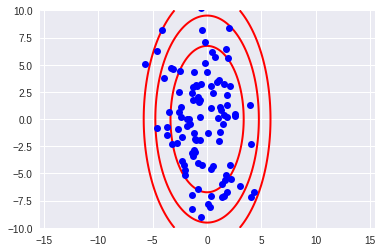

In [17]:
# Vertical stretch twice horozontal stretch, no tilt
var1 = random.uniform(1, 9)
var2 = 4 * var1
corr = 0
bivariate_plot(var1, var2, corr)